In [1]:
import string
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np

In [2]:
import pandas as pd

df = pd.read_csv('C:/Users/HP/sentiment analysis/review_chatgpt.csv',sep=',')
df.head()

,review,rating
0,point i’v mostli use chatgpt window desktop us...,positif
1,i’v user sinc it’ initi roll wait mobil applic...,positif
2,app would almost perfect wasn’t one littl thin...,positif
3,recent download app overal great platform exce...,positif
4,appreci dev implement siri support—it alreadi ...,positif


In [3]:
df.dropna()

,review,rating
0,point i’v mostli use chatgpt window desktop us...,positif
1,i’v user sinc it’ initi roll wait mobil applic...,positif
2,app would almost perfect wasn’t one littl thin...,positif
3,recent download app overal great platform exce...,positif
4,appreci dev implement siri support—it alreadi ...,positif
...,...,...
2243,come free trial chatgptgpt midjourney one place,positif
2244,begin someth crazi let y’all know i’v sinc day...,positif
2245,i’v use chat proud premium subscrib awhil help...,positif
2246,chatgpt io app outstand product seamless funct...,positif


In [4]:
df.shape

(2248, 2)

In [5]:
df = df.astype({'rating' : 'category'})
df = df.astype({'review' : 'string'})
df.dtypes

review      string
rating    category
dtype: object

In [6]:
#proses TF-IDF
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer()
text_tf = tf.fit_transform(df['review'].astype('U'))
text_tf

<2248x5191 sparse matrix of type '<class 'numpy.float64'>'
	with 38236 stored elements in Compressed Sparse Row format>

In [7]:
#splitting data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(text_tf, df['rating'], test_size=0.2, random_state=0)

In [8]:
print("Before OverSampling, counts of label 'POSITIF': {}".format(sum(y_train == 'positif')))
print("Before OverSampling, counts of label 'NEGATIF': {}".format(sum(y_train == 'negatif')))
print("Before OverSampling, counts of label 'NETRAL': {}".format(sum(y_train == 'netral')))

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 0)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After Oversampling, the sahpe of train_X: {}'.format(X_train_res.shape))
print('After Oversampling, the sahpe of train_y: {}'.format(y_train_res.shape))

print("After OverSampling, counts of label 'POSITIF': {}".format(sum(y_train_res == 'positif')))
print("After OverSampling, counts of label 'NEGATIF': {}".format(sum(y_train_res == 'negatif')))
print("Before OverSampling, counts of label 'NETRAL': {}".format(sum(y_train_res == 'netral')))

Before OverSampling, counts of label 'POSITIF': 1123
Before OverSampling, counts of label 'NEGATIF': 501
Before OverSampling, counts of label 'NETRAL': 174
After Oversampling, the sahpe of train_X: (3369, 5191)
After Oversampling, the sahpe of train_y: (3369,)
After OverSampling, counts of label 'POSITIF': 1123
After OverSampling, counts of label 'NEGATIF': 1123
Before OverSampling, counts of label 'NETRAL': 1123


In [9]:
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

clf = svm.SVC(kernel='rbf').fit(X_train_res, y_train_res)
predicted = clf.predict(X_test)

print("Akurasi SVM: ", accuracy_score(y_test, predicted))
print("Akurasi Precision: ", precision_score(y_test, predicted, average='weighted'))
print("Akurasi Recall: ", recall_score(y_test, predicted, average='weighted'))
print("Akurasi F1: ", f1_score(y_test, predicted, average='weighted'))

print(f'confusion matrix:\n {confusion_matrix(y_test, predicted)}')
print('------------------------------------------------------\n')
print(classification_report(y_test, predicted, zero_division=0))

Akurasi SVM:  0.7177777777777777
Akurasi Precision:  0.691398814893132
Akurasi Recall:  0.7177777777777777
Akurasi F1:  0.6696485100253724
confusion matrix:
 [[ 55   2  68]
 [  5   2  39]
 [ 11   2 266]]
------------------------------------------------------

              precision    recall  f1-score   support

     negatif       0.77      0.44      0.56       125
      netral       0.33      0.04      0.08        46
     positif       0.71      0.95      0.82       279

    accuracy                           0.72       450
   macro avg       0.61      0.48      0.48       450
weighted avg       0.69      0.72      0.67       450



In [10]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

print("Accuray: {:.2f}%".format(accuracy_score(y_test, predicted) * 100))
print("\nF1 Score: {:.2f}%".format(f1_score(y_test, predicted, average='weighted') * 100))
print("\nConfusion Matrix:\n",confusion_matrix(y_test, predicted))

Accuray: 71.78%

F1 Score: 66.96%

Confusion Matrix:
 [[ 55   2  68]
 [  5   2  39]
 [ 11   2 266]]


In [11]:
from matplotlib import pyplot as plt

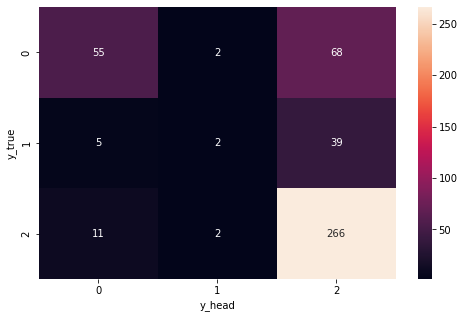

In [12]:
import seaborn as sns
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, predicted), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.show()

In [13]:
import os
import pickle
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer

X = df.review
y = df.rating

text_classifier = Pipeline([('tf', TfidfVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('classifier', svm.SVC(kernel='rbf')),
                     ]) 
X_train = np.asarray(X)
text_classifier = text_classifier.fit(X_train, np.asarray(y))

#save to Pickle
files = open('model_classifier_svm.pickle', 'wb')
pickle.dump(text_classifier, files)
files.close()

print('Proses Training Support Vector Machine Selesai!')

Proses Training Support Vector Machine Selesai!


In [14]:
model = open('model_classifier_svm.pickle', 'rb')
svm_classifier = pickle.load(model)
print(svm_classifier)

Pipeline(steps=[('tf', TfidfVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', SVC())])


In [16]:
df_review = pd.read_csv('C:/Users/HP/sentiment analysis/chatgpt_reviews_test.csv')
df_review = pd.DataFrame(df_review)
df_review = df_review.dropna()
df_review.head()

,review
0,Up to this point I’ve mostly been using ChatGP...
1,I’ve been a user since it’s initial roll out a...
2,This app would almost be perfect if it wasn’t ...
3,"I recently downloaded the app and overall, it'..."
4,I appreciate the devs implementing Siri suppor...


In [17]:
review = df_review.review

In [18]:
pd.DataFrame(review)

,review
0,Up to this point I’ve mostly been using ChatGP...
1,I’ve been a user since it’s initial roll out a...
2,This app would almost be perfect if it wasn’t ...
3,"I recently downloaded the app and overall, it'..."
4,I appreciate the devs implementing Siri suppor...
...,...
2287,This has to be a beginning to something crazy ...
2288,I’ve been using chat and have been a proud pre...
2289,The ChatGPT iOS app is an outstanding product....
2290,Sam Altman’s blatant attempt at regulatory cap...


In [20]:
predicted = svm_classifier.predict(np.asarray(review))
predicted

array(['positif', 'positif', 'positif', ..., 'positif', 'negatif',
       'positif'], dtype=object)

In [23]:
result_review=[]
for i in range(len(predicted)):
    if(predicted[i]=="positif"):
        sentiment_result=1
    elif(predicted[i]=="negatif"):
        sentiment_result=-1
    elif(predicted[i]=="netral"):
        sentiment_result=0
    result_review.append({'review':review[i], 'class':predicted[i], 'result_svm':sentiment_result})

In [24]:
data=pd.DataFrame(result_review)
data

,review,class,result_svm
0,Up to this point I’ve mostly been using ChatGP...,positif,1
1,I’ve been a user since it’s initial roll out a...,positif,1
2,This app would almost be perfect if it wasn’t ...,positif,1
3,"I recently downloaded the app and overall, it'...",positif,1
4,I appreciate the devs implementing Siri suppor...,positif,1
...,...,...,...
2287,This has to be a beginning to something crazy ...,positif,1
2288,I’ve been using chat and have been a proud pre...,positif,1
2289,The ChatGPT iOS app is an outstanding product....,positif,1
2290,Sam Altman’s blatant attempt at regulatory cap...,negatif,-1


In [27]:
data.to_csv('C:/Users/HP/sentiment analysis/sentiment result.csv', sep=',')

In [25]:
data.groupby(by='result_svm').agg('count')

,review,class
result_svm,,
-1,300,300
0,17,17
1,1975,1975


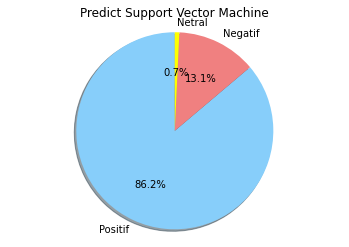

In [26]:
labels = ['Positif','Negatif', 'Netral']
quantity = [1975, 300, 17]
colors = [ 'lightskyblue', 'lightcoral', 'yellow']

plt.title('Predict Support Vector Machine')
plt.pie(quantity, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')
plt.show()